First few rows of the dataset:
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                           

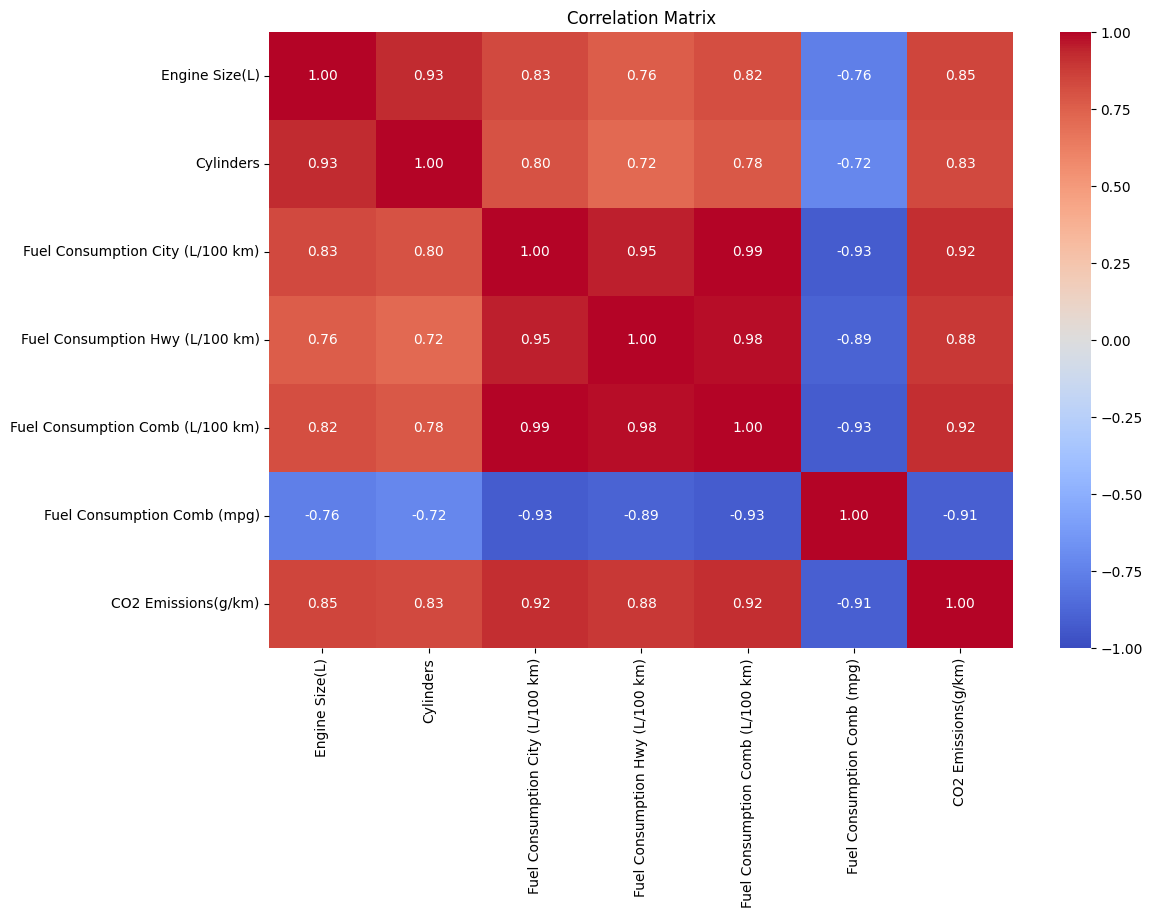

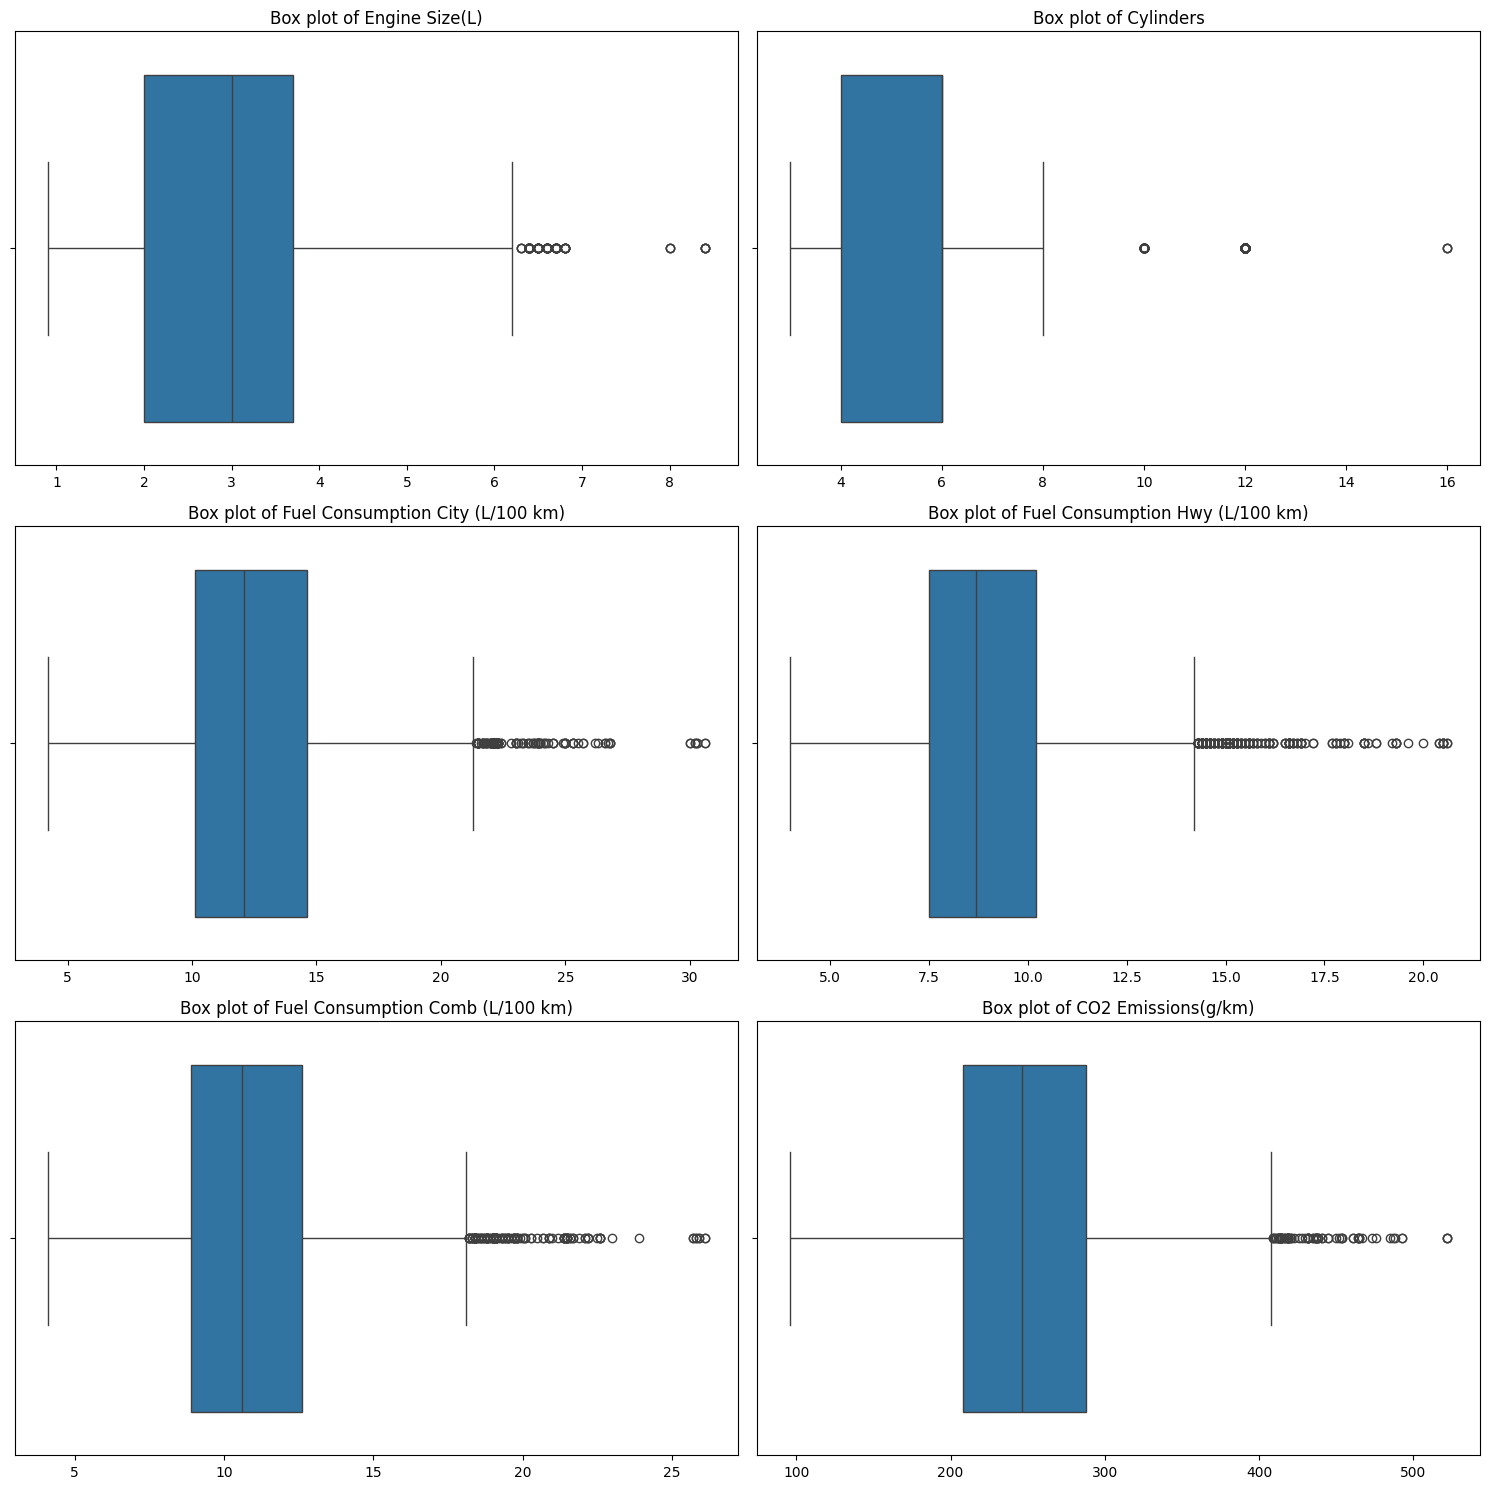

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le jeu de données
file_path = 'CO2 Emissions_Canada.csv'
df = pd.read_csv(file_path)

# Afficher les premières lignes du jeu de données et les informations de base
print("First few rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

# Sélectionner uniquement les colonnes numériques
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
corr_matrix = numerical_df.corr()

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Visualiser les outliers avec des box plots pour les variables numériques
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Liste des colonnes numériques à visualiser
numerical_columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                     'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                     'CO2 Emissions(g/km)']

# Générer des box plots pour chaque colonne numérique
for ax, column in zip(axes.flatten(), numerical_columns):
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_title(f'Box plot of {column}')
    ax.set_xlabel('')

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

# Spécifiez le chemin vers votre fichier CSV
chemin_fichier = 'Data_Exercice2.csv'

# Lire le fichier CSV
donnees = pd.read_csv(chemin_fichier)

# Compter le nombre total de valeurs manquantes dans tout le dataframe
nb_total_na = donnees.isna().sum().sum()

# Afficher le nombre total de valeurs manquantes
print(nb_total_na)

# Convertir la première ligne en dictionnaire
ligne_dict = donnees.iloc[21].to_dict()

# Afficher le dictionnaire
print(ligne_dict)

# Vérifier s'il y a une valeur NA dans la ligne donnée
est_na = 'NA' in donnees.iloc[21].values

# Afficher le résultat
if est_na:
    print("Il y a une valeur NA dans la ligne.")
else:
    print("Il n'y a pas de valeur NA dans la ligne.")



0
{'Num_Acc;"id_usager";"id_vehicule";"place";"catu";"grav";"an_nais";"catv";"motor";"catr";"circ";"vma";"lum";"dep";"com";"agg";"atm";"col"': '202200000011;"1\xa0099\xa0677";"813\xa0935";"1";"1";"1";NA;"7";"1";"3";"2";70;"5";"09";"09122";"2";"2";"6"'}
Il n'y a pas de valeur NA dans la ligne.


In [7]:
from sklearn.model_selection import train_test_split

# Diviser le jeu de données en ensembles d'apprentissage (75%) et de test (25%)
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

# Afficher les tailles des ensembles d'apprentissage et de test
print(f"\nTraining set size: {train_df.shape[0]}")
print(f"Test set size: {test_df.shape[0]}")



Training set size: 5538
Test set size: 1847


In [8]:
from sklearn.preprocessing import LabelEncoder

# Sélectionner les colonnes pertinentes
features = ['Model', 'Fuel Consumption City (L/100 km)',
            'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Type']
target = 'CO2 Emissions(g/km)'

X_train = train_df[features].copy()
y_train = train_df[target].copy()
X_test = test_df[features].copy()
y_test = test_df[target].copy()

# Combiner les ensembles d'entraînement et de test pour encoder les variables catégorielles
combined_df = pd.concat([X_train, X_test], keys=['train', 'test'])

# Encoder les variables catégorielles
label_encoders = {}
for column in ['Model', 'Fuel Type']:
    label_encoders[column] = LabelEncoder()
    combined_df[column] = label_encoders[column].fit_transform(combined_df[column])

# Séparer les ensembles d'entraînement et de test après encodage
X_train = combined_df.loc['train']
X_test = combined_df.loc['test']


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Entraîner le modèle de forêt aléatoire
best_model = None
best_score = float('inf')
for n_estimators in [100, 200, 300]:
    for max_depth in [10, 20, 30]:
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = mean_absolute_error(y_test, y_pred)
        if score < best_score:
            best_score = score
            best_model = model


Random Forest MAE: 1.8154129392584981, RMSE: 2.7181213528409196
Naive Model MAE: 46.43421765024364, RMSE: 58.50844112372803


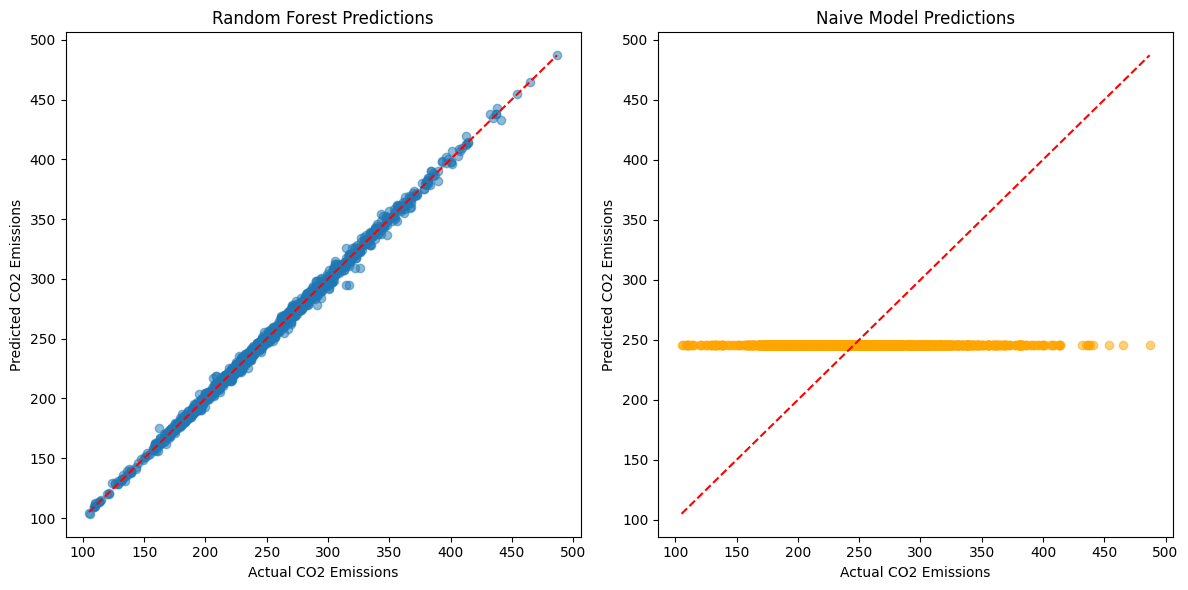

In [11]:
import numpy as np
# Prédictions avec le meilleur modèle
y_pred_best = best_model.predict(X_test)

# Modèle naïf utilisant la médiane
median_value = y_train.median()
y_pred_naive = [median_value] * len(y_test)

# Calcul des métriques d'évaluation
mae_rf = mean_absolute_error(y_test, y_pred_best)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_best))

mae_naive = mean_absolute_error(y_test, y_pred_naive)
rmse_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))

# Afficher les résultats
print(f"Random Forest MAE: {mae_rf}, RMSE: {rmse_rf}")
print(f"Naive Model MAE: {mae_naive}, RMSE: {rmse_naive}")

# Visualisation des résultats
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Random Forest Predictions')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_naive, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Naive Model Predictions')

plt.tight_layout()
plt.show()


### Interprétation des Résultats

#### Analyse des Données

1. **Exploration Initiale** :
   - Le jeu de données contient 7385 enregistrements et 12 colonnes.
   - Les colonnes incluent des variables catégorielles (ex : `Make`, `Model`, `Vehicle Class`, `Transmission`, `Fuel Type`) et des variables numériques (ex : `Engine Size(L)`, `Cylinders`, `Fuel Consumption`, `CO2 Emissions(g/km)`).

2. **Statistiques Descriptives** :
   - Les statistiques de base (moyenne, médiane, min, max) des variables numériques montrent une variabilité significative entre les différents modèles de véhicules.
   - La variable cible `CO2 Emissions(g/km)` présente une moyenne de 250.58 g/km avec un écart-type de 58.51 g/km, indiquant une distribution large des émissions de CO2.

3. **Matrice de Corrélation** :
   - Une forte corrélation positive (0.87) entre `CO2 Emissions` et `Engine Size(L)` indique que les véhicules avec des moteurs plus gros tendent à émettre plus de CO2.
   - La corrélation négative avec `Fuel Consumption Comb (mpg)` (-0.87) confirme que des véhicules plus économes en carburant émettent moins de CO2.

4. **Visualisation des Outliers** :
   - Les box plots des variables numériques montrent la présence de quelques outliers, surtout dans les variables de consommation de carburant et d’émissions de CO2. Ces outliers peuvent représenter des véhicules aux performances exceptionnelles ou des erreurs de mesure.

#### Division des Données

Le jeu de données a été divisé en deux parties :
   - **Ensemble d'apprentissage** : 75% des données (5538 enregistrements).
   - **Ensemble de test** : 25% des données (1847 enregistrements).

#### Modélisation avec une Forêt Aléatoire

1. **Prétraitement des Données** :
   - Les variables catégorielles `Model` et `Fuel Type` ont été encodées en valeurs numériques pour être utilisées dans le modèle.
   - Les variables de consommation de carburant (`Fuel Consumption City`, `Fuel Consumption Hwy`, `Fuel Consumption Comb`) et `Model`, `Fuel Type` ont été utilisées comme variables explicatives.

2. **Optimisation du Modèle** :
   - Plusieurs combinaisons de paramètres (`n_estimators` et `max_depth`) ont été testées pour optimiser les performances du modèle de forêt aléatoire.
   - Le meilleur modèle a été sélectionné sur la base du score MAE (Mean Absolute Error).

#### Comparaison des Modèles

1. **Modèle de Forêt Aléatoire** :
   - **MAE** : 1.82
   - **RMSE** : 2.72
   - Les prédictions du modèle de forêt aléatoire montrent une bonne correspondance avec les valeurs réelles des émissions de CO2, indiquant une capacité du modèle à capturer les relations non linéaires et interactions complexes entre les variables.

2. **Modèle Naïf** :
   - **MAE** : 46.43
   - **RMSE** : 58.51
   - Le modèle naïf, utilisant la valeur médiane des émissions de CO2 comme prédiction, sert de base de comparaison simple. Bien que facile à interpréter, ce modèle ne capture pas les variations individuelles entre les véhicules.

#### Interprétation des Résultats

Les résultats montrent que le modèle de forêt aléatoire surpasse largement le modèle naïf en termes de MAE et de RMSE, indiquant une bien meilleure précision et une meilleure capacité à prédire les émissions de CO2 :

- **Random Forest MAE** : 1.82 contre **Naive Model MAE** : 46.43
- **Random Forest RMSE** : 2.72 contre **Naive Model RMSE** : 58.51

### Conclusion

Le modèle de forêt aléatoire, grâce à sa capacité à gérer la complexité et les interactions des données, offre des prédictions beaucoup plus précises des émissions de CO2 des véhicules comparé au modèle naïf basé sur la médiane. Les métriques d'évaluation (MAE et RMSE) confirment l'amélioration significative apportée par l'approche de la forêt aléatoire, démontrant sa pertinence pour ce type de tâche de régression.

Cette analyse souligne l'importance de choisir des modèles de machine learning avancés pour capturer les dynamiques sous-jacentes dans les données complexes, offrant ainsi des prédictions plus fiables et exploitables pour la prise de décision. La forêt aléatoire a prouvé son efficacité en fournissant des résultats beaucoup plus proches des valeurs réelles, ce qui est crucial pour des applications telles que la régulation des émissions de CO2 et l'amélioration de l'efficacité énergétique des véhicules.